<a href="https://colab.research.google.com/github/SatyamChoubey/Stock-prediction/blob/main/Stock_Price_Prediction_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price prediction using Facebook Prophet

In [11]:
# Name of the stock : ITI LTD

In [3]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

In [4]:
## Importing all the necessary Libraries

In [5]:
#Necessary libraries = Pandas, fbprophet and plotly

# pandas= data Manipulation and analysis
# fbprophet = Forecasting
# plotly= data visualization


In [18]:
import pandas as pd
import plotly.express as px

In [30]:
from prophet import Prophet

In [31]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

In [32]:
## Importing the Dataset & Exploring it

Import data from yahoo finance

In [33]:
df = pd.read_csv("ITI.NS.csv")

In [8]:
#read_csv function from pandas

In [34]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-03,91.300003,91.800003,90.250000,91.000000,91.000000,300017
1,2023-04-05,91.099998,92.849998,91.000000,91.599998,91.599998,285979
2,2023-04-06,92.000000,92.000000,90.900002,91.500000,91.500000,142637
3,2023-04-10,91.500000,92.500000,90.699997,91.599998,91.599998,164153
4,2023-04-11,91.900002,92.300003,91.449997,91.849998,91.849998,103549
...,...,...,...,...,...,...,...
241,2024-03-27,254.000000,260.000000,251.600006,253.850006,253.850006,1808337
242,2024-03-28,256.149994,262.000000,249.500000,252.699997,252.699997,1770095
243,2024-04-01,255.000000,272.950012,253.649994,270.600006,270.600006,2661555
244,2024-04-02,271.049988,277.100006,267.549988,272.600006,272.600006,1810680


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       246 non-null    object 
 1   Open       246 non-null    float64
 2   High       246 non-null    float64
 3   Low        246 non-null    float64
 4   Close      246 non-null    float64
 5   Adj Close  246 non-null    float64
 6   Volume     246 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


In [38]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,203.132520,209.281301,198.414024,202.915243,202.915243,4.369349e+06
std,92.316448,95.731220,89.020217,91.495282,91.495282,9.370553e+06
min,91.050003,91.800003,90.000000,91.000000,91.000000,1.035490e+05
25%,108.912501,110.462498,108.150002,108.699997,108.699997,4.720178e+05
50%,198.824997,206.849998,192.000000,200.324997,200.324997,1.450094e+06
75%,289.750000,300.462509,279.000000,290.112488,290.112488,3.486130e+06
max,366.600006,384.299988,353.799988,373.850006,373.850006,7.525307e+07


# Data Visualization using plotly express- Visualizing the historical performance of stock

In [10]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [39]:
px.area(df, x='Date', y='Close')

In [40]:
px.line(df, x='Date', y='Close')

In [45]:
px.area(df, x='Date', y='Volume')

In [42]:
px.bar(df, y='Volume')

In [43]:
px.box(df, y='Close')

## Data Preparation

In [46]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-03,91.300003,91.800003,90.250000,91.000000,91.000000,300017
1,2023-04-05,91.099998,92.849998,91.000000,91.599998,91.599998,285979
2,2023-04-06,92.000000,92.000000,90.900002,91.500000,91.500000,142637
3,2023-04-10,91.500000,92.500000,90.699997,91.599998,91.599998,164153
4,2023-04-11,91.900002,92.300003,91.449997,91.849998,91.849998,103549
...,...,...,...,...,...,...,...
241,2024-03-27,254.000000,260.000000,251.600006,253.850006,253.850006,1808337
242,2024-03-28,256.149994,262.000000,249.500000,252.699997,252.699997,1770095
243,2024-04-01,255.000000,272.950012,253.649994,270.600006,270.600006,2661555
244,2024-04-02,271.049988,277.100006,267.549988,272.600006,272.600006,1810680


In [47]:
columns=['Date',"Close"]
ndf=pd.DataFrame(df, columns=columns)

In [48]:
ndf

,Date,Close
0,2023-04-03,91.000000
1,2023-04-05,91.599998
2,2023-04-06,91.500000
3,2023-04-10,91.599998
4,2023-04-11,91.849998
...,...,...
241,2024-03-27,253.850006
242,2024-03-28,252.699997
243,2024-04-01,270.600006
244,2024-04-02,272.600006


In [49]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [51]:
prophet_df

,ds,y
0,2023-04-03,91.000000
1,2023-04-05,91.599998
2,2023-04-06,91.500000
3,2023-04-10,91.599998
4,2023-04-11,91.849998
...,...,...
241,2024-03-27,253.850006
242,2024-03-28,252.699997
243,2024-04-01,270.600006
244,2024-04-02,272.600006


## Creating Facebook Prophet Model

In [53]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbz11gey3/3gey8fk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbz11gey3/572gbqgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27548', 'data', 'file=/tmp/tmpbz11gey3/3gey8fk5.json', 'init=/tmp/tmpbz11gey3/572gbqgq.json', 'output', 'file=/tmp/tmpbz11gey3/prophet_modelow673iyo/prophet_model-20240403095531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:55:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:55:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [54]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [55]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-03,92.201132,72.571801,113.067884,92.201132,92.201132,0.192095,0.192095,0.192095,0.192095,0.192095,0.192095,0.0,0.0,0.0,92.393226
1,2023-04-05,92.562886,72.843879,112.907493,92.562886,92.562886,-0.229939,-0.229939,-0.229939,-0.229939,-0.229939,-0.229939,0.0,0.0,0.0,92.332946
2,2023-04-06,92.743763,72.165153,112.709185,92.743763,92.743763,0.124758,0.124758,0.124758,0.124758,0.124758,0.124758,0.0,0.0,0.0,92.868521
3,2023-04-10,93.467271,74.119736,112.038940,93.467271,93.467271,0.192095,0.192095,0.192095,0.192095,0.192095,0.192095,0.0,0.0,0.0,93.659366
4,2023-04-11,93.648148,74.541446,115.490309,93.648148,93.648148,1.475921,1.475921,1.475921,1.475921,1.475921,1.475921,0.0,0.0,0.0,95.124068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2024-04-29,240.709870,220.723570,260.792692,234.438770,245.939833,0.192095,0.192095,0.192095,0.192095,0.192095,0.192095,0.0,0.0,0.0,240.901965
272,2024-04-30,239.839582,219.740714,262.597825,233.248633,245.338979,1.475921,1.475921,1.475921,1.475921,1.475921,1.475921,0.0,0.0,0.0,241.315503
273,2024-05-01,238.969294,217.815807,259.866707,232.065136,244.836420,-0.229939,-0.229939,-0.229939,-0.229939,-0.229939,-0.229939,0.0,0.0,0.0,238.739355
274,2024-05-02,238.099006,217.876662,260.009343,230.817440,244.220703,0.124758,0.124758,0.124758,0.124758,0.124758,0.124758,0.0,0.0,0.0,238.223765


In [56]:
px.line(forecast, x= 'ds', y='yhat')

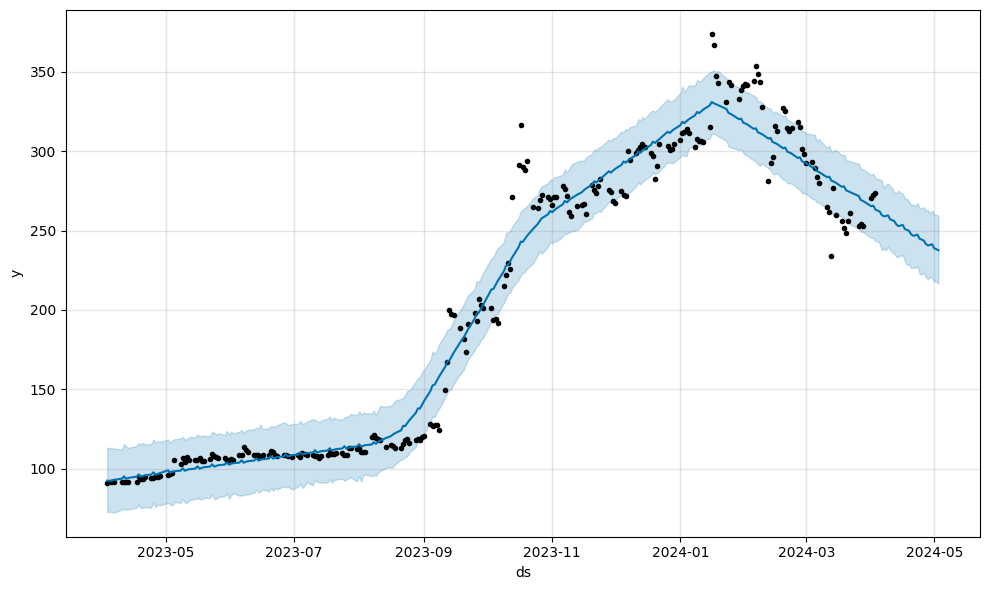

In [57]:
figure = m.plot(forecast, xlabel='ds', ylabel ="y")

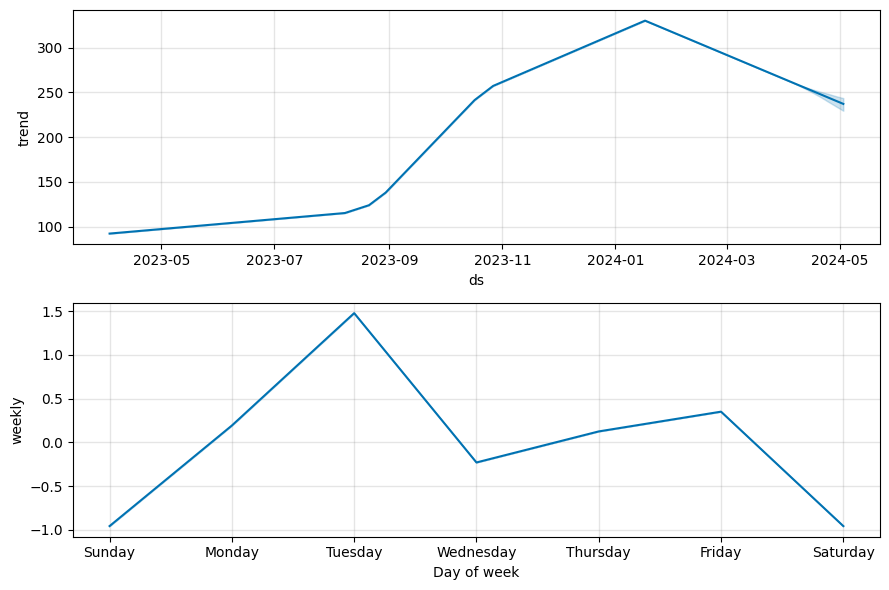

In [58]:
figure2=m.plot_components(forecast)

## Downloading the Forecast data

In [59]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>